In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [7]:
mls_df = pd.read_csv("/kaggle/input/football-match-statistics-and-more/fixture_stats_clean.csv")
ptfc_player = pd.read_csv("/kaggle/input/football-match-statistics-and-more/fixture_stats_players_clean.csv")
mls_df = mls_df[mls_df['league_name'] == 'Major League Soccer']
ptfc_player = ptfc_player[ptfc_player['team_name'] == 'Portland Timbers']
mls_df.shape # 5226 games, 39 columns
ptfc_player.shape


# Extract only Timbers games from the data
timbers_home = mls_df["teams_home_name"] == "Portland Timbers"
timbers_away = mls_df["teams_away_name"] == "Portland Timbers"
timbers_any = timbers_home | timbers_away
timbersdf = mls_df[timbers_any]
print(timbersdf[['teams_home_name','teams_away_name','league_season']].head(5)) # display matchups
print(timbersdf[['teams_home_name','teams_away_name','league_season']].tail(5)) # display matchups
timbersdf.shape # 455 games, 39 data columns
timbersdf.columns

<ipython-input-7-19e6963f828e>:1: DtypeWarning: Columns (24,28) have mixed types. Specify dtype option on import or set low_memory=False.
  mls_df = pd.read_csv("/kaggle/input/football-match-statistics-and-more/fixture_stats_clean.csv")


          teams_home_name   teams_away_name  league_season
228   Vancouver Whitecaps  Portland Timbers           2024
290        St. Louis City  Portland Timbers           2024
420    Philadelphia Union  Portland Timbers           2013
447            Toronto FC  Portland Timbers           2012
1330         Nashville SC  Portland Timbers           2022
        teams_home_name      teams_away_name  league_season
44474   Orlando City SC     Portland Timbers           2016
46909  Portland Timbers       Real Salt Lake           2019
46911  Portland Timbers  Vancouver Whitecaps           2019
48122  Portland Timbers      Orlando City SC           2020
48130  Portland Timbers       Houston Dynamo           2020


Index(['fixture_id', 'fixture_date', 'fixture_timezone', 'fixture_timestamp',
       'fixture_periods_first', 'fixture_periods_second', 'fixture_referee',
       'fixture_venue_id', 'fixture_venue_name', 'fixture_venue_city',
       'fixture_status_long', 'fixture_status_short', 'fixture_status_elapsed',
       'fixture_status_extra', 'league_id', 'league_name', 'league_country',
       'league_logo', 'league_flag', 'league_season', 'league_round',
       'teams_home_id', 'teams_home_name', 'teams_home_logo',
       'teams_home_winner', 'teams_away_id', 'teams_away_name',
       'teams_away_logo', 'teams_away_winner', 'goals_home', 'goals_away',
       'score_halftime_home', 'score_halftime_away', 'score_fulltime_home',
       'score_fulltime_away', 'score_extratime_home', 'score_extratime_away',
       'score_penalty_home', 'score_penalty_away'],
      dtype='object')

In [3]:
timbersdf['timbers_win'] = timbersdf['teams_home_winner']
timbersdf['timbers_win'] = timbersdf['teams_home_winner'].where(
    timbersdf['teams_away_name'] != "Portland Timbers",  # Keep home win unless Timbers was away
    timbersdf['teams_away_winner']  # Replace with away win when Timbers was away
)
timbersdf['timbers_win'] = timbersdf['timbers_win'].fillna(0)
timbersdf['timbers_win'] = timbersdf['timbers_win'].astype(int)

ptfc_byseason = timbersdf.groupby('league_season', as_index=True).sum() # League season is now index (row) identifier


<ipython-input-3-66c2cb889e4e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  timbersdf['timbers_win'] = timbersdf['teams_home_winner']
<ipython-input-3-66c2cb889e4e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  timbersdf['timbers_win'] = timbersdf['teams_home_winner'].where(
<ipython-input-3-66c2cb889e4e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://

<ipython-input-4-bbb288551ae0>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(season, rotation=90, ha="center")


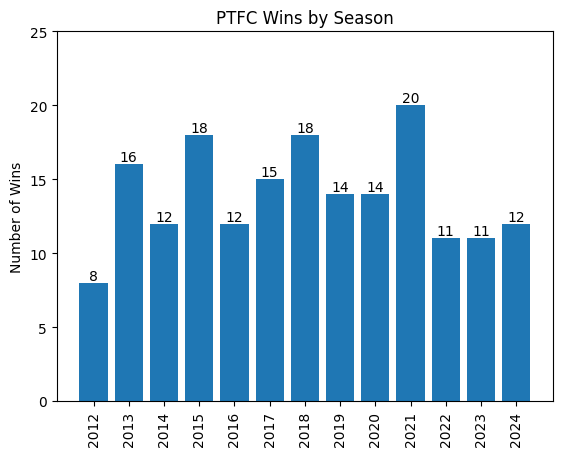

Index(['fixture_id', 'team_id', 'team_name', 'team_logo', 'update',
       'player_id', 'player_name', 'position', 'game_minutes', 'game_number',
       'rating', 'captain', 'substitute', 'shots_total', 'shots_on',
       'goals_total', 'goals_conceded', 'assists', 'saves', 'total_passes',
       'completed_passes', 'pass_percentage', 'key_passes', 'total_tackles',
       'blocks_tackles', 'interceptions_tackles', 'duels_total', 'duels_won',
       'dribbles_attempts', 'dribbles_success', 'dribbles_past', 'fouls_drawn',
       'fouls_committed', 'yellow_cards', 'red_cards', 'penalty_won',
       'penalty_committed', 'penalty_scored', 'penalty_missed',
       'penalty_saved'],
      dtype='object')


,goals_total
player_name,
Diego Valeri,71
Fanendo Adi,45
Felipe Mora,40
Dairon Asprilla,35
Sebastian Blanco,29
Jeremy Ebobisse,28
Evander,24
Jarosław Niezgoda,20
Sebastián Blanco,18


In [4]:
width = 0.6  # the width of the bars: can also be len(x) sequence


fig, ax = plt.subplots()

season = ptfc_byseason.index.astype(int).astype(str)
# Convert the league season to strings properly
bar_container = ax.bar(season, ptfc_byseason['timbers_win'])

# Set axis labels and title
ax.set(ylabel='Number of Wins', title='PTFC Wins by Season', ylim=(0, 25))

ax.set_xticklabels(season, rotation=90, ha="center")

# Add bar labels
ax.bar_label(bar_container)

# Show plot
plt.show()


#ptfc_player = ptfc_player.groupby("player_name").sum(numeric_only = True)
# print(ptfc_player.columns)
# ptfc_player = ptfc_player.groupby("player_name").sum(numeric_only = True)
# ptfc_player[['goals_total']].sort_values('goals_total',ascending=False).head(10)

In [9]:
season = pd.read_csv("/kaggle/input/football-match-statistics-and-more/fixture_stats_clean.csv")

<ipython-input-9-917d1254ba6f>:1: DtypeWarning: Columns (24,28) have mixed types. Specify dtype option on import or set low_memory=False.
  season = pd.read_csv("/kaggle/input/football-match-statistics-and-more/fixture_stats_clean.csv")


In [13]:
season = season[['fixture_id','league_season']]
ptfc_player = ptfc_player.merge(season,left_on = ['fixture_id'],right_on = ['fixture_id'])

In [25]:
szn_avgs = ptfc_player.groupby(['league_season','player_name']).mean(numeric_only=True).reset_index()

In [26]:
szn_avgs

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pan

,league_season,player_name,fixture_id,team_id,player_id,game_minutes,game_number,rating,captain,substitute,...,dribbles_past,fouls_drawn,fouls_committed,yellow_cards,red_cards,penalty_won,penalty_committed,penalty_scored,penalty_missed,penalty_saved
0,2015,Adam Kwarasey,4.912789e+05,1617.0,39106.0,90.000000,12.0,6.747059,0.0,0.000000,...,0.029412,0.176471,0.058824,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
1,2015,Alvas Powell,4.912652e+05,1617.0,50981.0,88.060606,2.0,7.081818,0.0,0.000000,...,1.000000,1.212121,1.000000,0.242424,0.0,0.0,0.0,0.0,0.000000,0.0
2,2015,Andrew Weber,4.913060e+05,1617.0,171710.0,90.000000,33.0,6.400000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
3,2015,Dairon Asprilla,4.912601e+05,1617.0,51240.0,40.107143,11.0,6.428571,0.0,0.321429,...,0.285714,0.464286,1.071429,0.071429,0.0,0.0,0.0,0.0,0.000000,0.0
4,2015,Darlington Nagbe,4.912741e+05,1617.0,50887.0,86.342857,6.0,7.342857,0.0,0.000000,...,0.257143,2.571429,0.342857,0.000000,0.0,0.0,0.0,0.0,0.028571,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,2024,Sawyer Jura,1.151008e+06,1617.0,383793.0,13.000000,51.0,1.725000,0.0,1.000000,...,0.000000,0.250000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
282,2024,Tega Ikoba,1.151046e+06,1617.0,201730.0,6.000000,17.0,0.700000,0.0,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
283,2024,Trey Muse,1.151018e+06,1617.0,70136.0,NaN,25.0,0.000000,0.0,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
284,2024,Tyler Clegg,1.151020e+06,1617.0,412229.0,NaN,39.0,0.000000,0.0,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
